## HospeDate S.A. 

**Primera Entrega del Proyecto de Data Science - CoderHouse 2022**

**Comisión:** 32695

**Profesor:** Ignacio Russo Locati

**Tutor:** Oswaldo Villa

**Integrantes:** Nestor Kevin Cruz - Mauro Nicolás Rivero

### Contexto Comercial

**HospeDate SA** es una cadena Portuguesa que administra hoteles, a través de su área de contabilidad pidió recabar información sobre las reservas hechas en sus establecimientos, para llevar a cabo un análisis completo con el fin de detectar oportunidades para aumentar sus ingresos y conocer las preferencias de sus usuarios.

### Problema Comercial

El rubro hotelero está sujeto a varios eventos externos que hacen complejas las tomas de decisiones como la competencia, clima metereológico y la estacionalidad pero hay otros eventos que podemos llegar a preveer como las **Cancelaciones de reservas** que afectan la explotacion de las habitaciones, es por eso que vamos a concentrarnos en este fenómeno.

### Definición del Objetivo

Como objetivo principal nos proponemos desarrollar un modelo que pueda predecir que porcentaje aproximado de reservas serán canceladas.

Como objetivo secundario y en base al porcentaje arrojado por el modelo decidir de que forma se va a trabajar ese resultado para maximizar las ganancias al sobrevender habitaciones susceptibles a ser canceladas en una primer instancia o minimizar las pérdidas tratando de conservar el cliente ofreciendo mejoras en los servicios

### Contexto Analítico

Disponemos de un dataset con las reservas hechas en los ultimos 3 años (casi 120.000 datos) divididos en 32 columnas con datos cuantitativos y cualitativos, las cuales vamos a analizar para ir reduciendo sus números y asi el contexto sobre el cual nos vamos a enfocar para el trabajo.

**Fuente:** <https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand>

In [1]:
# Importamos las librerías que vamos a necesitar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("Paired")
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
# Cargamos la url,la leemos e imprimimos el head
url = 'https://raw.githubusercontent.com/MauroNicolasRivero/Data-Science/main/hotel_bookings.csv'
Hotel = pd.read_csv(url, sep=(';'))
Hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Wranglig

Aqui comienza el proceso de transformación y limpieza de los datos para su posterior análisis

In [3]:
# Mostramos toda la información en general de la que vamos a disponer
Hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Consultamos si hay datos nulos
Hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Contamos con un dataset con **119390 filas** y **32 columnas**, observamos que hay poco datos nulos en las columnas que nos van a ser de interés y los tipos de datos son numéricos y categóricos, de estos últimos vamos a encargarnos de transformarlos para poder entrenar el algoritmo.

In [5]:
# Creamos nuevas columnas sumando datos que nos interesan que estén en una sola variable
Hotel['People_Sum'] = Hotel.adults + Hotel.children + Hotel.babies
Hotel['Days_Sum'] = Hotel.stays_in_weekend_nights + Hotel.stays_in_week_nights
Hotel['Date_arrive']= pd.to_datetime(Hotel.arrival_date_year.astype(str) + '/' + Hotel.arrival_date_month.astype(str) + '/' + Hotel.arrival_date_day_of_month.astype(str))   

# Asignamos el tipo de dato 'datetime' para poder hacer un nueva columna con una resta entre fechas
Hotel['reservation_status_date']= pd.to_datetime(Hotel['reservation_status_date'])
Hotel['Day_dif'] = Hotel['Date_arrive'] - Hotel['reservation_status_date']

In [6]:
# Eliminamos las columnas que no vamos a tomar en cuenta
Hotel_1 = Hotel.drop(Hotel.iloc[ : , [2,3,4,5,6,7,8,9,10,11,15,18,21,23,24,25,28,29,30]], axis = 1)
Hotel_1

,hotel,is_canceled,meal,country,market_segment,is_repeated_guest,previous_cancellations,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,reservation_status_date,People_Sum,Days_Sum,Date_arrive,Day_dif
0,Resort Hotel,0,BB,PRT,Direct,0,0,C,C,No Deposit,Transient,0.00,2015-07-01,2.0,0,2015-07-01,0 days
1,Resort Hotel,0,BB,PRT,Direct,0,0,C,C,No Deposit,Transient,0.00,2015-07-01,2.0,0,2015-07-01,0 days
2,Resort Hotel,0,BB,GBR,Direct,0,0,A,C,No Deposit,Transient,75.00,2015-07-02,1.0,1,2015-07-01,-1 days
3,Resort Hotel,0,BB,GBR,Corporate,0,0,A,A,No Deposit,Transient,75.00,2015-07-02,1.0,1,2015-07-01,-1 days
4,Resort Hotel,0,BB,GBR,Online TA,0,0,A,A,No Deposit,Transient,98.00,2015-07-03,2.0,2,2015-07-01,-2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,BB,BEL,Offline TA/TO,0,0,A,A,No Deposit,Transient,96.14,2017-09-06,2.0,7,2017-08-30,-7 days
119386,City Hotel,0,BB,FRA,Online TA,0,0,E,E,No Deposit,Transient,225.43,2017-09-07,3.0,7,2017-08-31,-7 days
119387,City Hotel,0,BB,DEU,Online TA,0,0,D,D,No Deposit,Transient,157.71,2017-09-07,2.0,7,2017-08-31,-7 days
119388,City Hotel,0,BB,GBR,Online TA,0,0,A,A,No Deposit,Transient,104.40,2017-09-07,2.0,7,2017-08-31,-7 days


In [7]:
# Eliminamos los valores que no nos interesa tener en cero y reseteamos el index
Hotel_1['country'] = Hotel_1['country'].replace(0, np.nan)
Hotel_1['People_Sum'] = Hotel_1['People_Sum'].replace(0, np.nan)
Hotel_1['Days_Sum'] =Hotel_1['Days_Sum'].replace(0, np.nan)
Hotel_1.dropna(inplace=True)
Hotel_1 = Hotel_1.reset_index(drop=True)

Fin de la etapa de **Data Wrangling**, sobre el Dataset original:

* Creamos la variable *People_Sum* sumando las columnas  *adults*,*children* y *babies*.
* Creamos la variable *Days_Sum* sumando las columnas *stays_in_weekend_nights* y *stays_in_week_nights*.
* Creamos la variable *Date_arrive* sumando las columnas *arrival_date_year*, *arrival_date_month* y *arrival_date_day_of_month* las cuales con anterioridad fueron cambiadas los tipos de datos para permitir la concatenacion como Strings.
* Creamos la variable *Day_dif* restando las fechas *Date_arrive* menos *reservation_status_date* para conocer cuantos días antes a la fecha de arribo se producia la cancelación.
* Cambiamos el tipo de dato a las columnas que tenian información sobre fechas.

## Análisis Exploratorio de las Variables del Dataset

En esta etapa vamos a explorar las variables, graficandolas según corresponda con su contenido y haciendo luego un breve análisis sobre lo que nos muestra el gráfico

### Cancelaciones

Primero vamos a conocer que porcentaje del total de reservas fueron canceladas

0    73973
1    44115
Name: is_canceled, dtype: int64

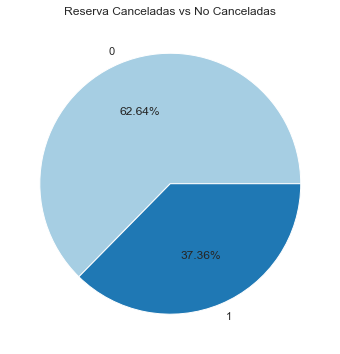

In [8]:
Is_canceled_or_not = Hotel_1.is_canceled.value_counts()
Is_canceled_or_not

fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(Is_canceled_or_not, labels = Is_canceled_or_not.index, autopct='%1.2f%%')
ax.set_title('Reserva Canceladas vs No Canceladas')
Hotel_1.is_canceled.value_counts()

Observamos que el 37.36 % de las reservas hechas fueron posteriormente canceladas, por lo cuál de ahora en más vamos a enfocarnos en esos datos buscando patrones que nos ayuden a armar el modelo

In [9]:
# Hacemos un filtro sobre la variabe "is_canceled" para trabajar solamente con las reservas canceladas
# El propósito es descubrir patrones de comportamiento de los clientes que han cancelado la reserva

canceled = Hotel_1[Hotel_1['is_canceled'] == 1]
canceled

,hotel,is_canceled,meal,country,market_segment,is_repeated_guest,previous_cancellations,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,reservation_status_date,People_Sum,Days_Sum,Date_arrive,Day_dif
6,Resort Hotel,1,BB,PRT,Online TA,0,0,A,A,No Deposit,Transient,82.0,2015-05-06,2.0,3.0,2015-07-01,56 days
7,Resort Hotel,1,HB,PRT,Offline TA/TO,0,0,D,D,No Deposit,Transient,105.5,2015-04-22,2.0,3.0,2015-07-01,70 days
8,Resort Hotel,1,BB,PRT,Online TA,0,0,E,E,No Deposit,Transient,123.0,2015-06-23,2.0,4.0,2015-07-01,8 days
25,Resort Hotel,1,BB,PRT,Online TA,0,0,E,E,No Deposit,Transient,107.0,2015-05-11,2.0,7.0,2015-07-01,51 days
29,Resort Hotel,1,BB,PRT,Direct,0,0,E,E,No Deposit,Transient,108.3,2015-05-29,2.0,10.0,2015-07-01,33 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107563,City Hotel,1,BB,FRA,Corporate,1,0,E,F,No Deposit,Transient,125.0,2017-05-06,1.0,3.0,2017-05-06,0 days
110080,City Hotel,1,BB,PRT,Corporate,1,0,A,A,No Deposit,Transient,65.0,2017-06-05,1.0,1.0,2017-06-05,0 days
110644,City Hotel,1,BB,PRT,Corporate,1,0,A,A,No Deposit,Transient,65.0,2017-05-31,1.0,1.0,2017-05-31,0 days
110645,City Hotel,1,BB,PRT,Corporate,1,1,A,D,No Deposit,Transient,65.0,2017-07-17,1.0,1.0,2017-07-17,0 days


### Breve descripción de las variables que vamos a utilizar
 
 1. **Hotel**: *Tipos de hoteles*
 2. **Is_canceled**: *Muestra si fue o no cancelada la reserva*
 3. **Meal**: *Comidas ofrecidas por el hotel*
 4. **Country**: *País procedente de los huéspedes*
 5. **Market_Segment**: *Segmento del mercado que operó en la reserva*
 6. **Is_repeated_guest**: *Si el cliente ya ha reservado en alguna otra ocasión*
 7. **Previuos_cancellations**: *Si el cliente ha incurrido en una cancelación anteriormente*
 8. **Reserved_room_type**: *Tipo de habitación reservada*
 9. **Assigned_room_type**: *Tipo de habitación asignada*
 10. **Deposit_type**: *Muestra si han hecho un depósito previo o no*
 11. **Customer_type**: *Muestra que tipos de clientes son* 
 12. **Adr**: *Es una métrica que muestra la tarifa promedio por habitación*
 13. **Reservation_status_date**: *Fecha de la última actualización de la reserva*
 14. **People_sum**: *Es la suma de las distintas variables que representan los huéspedes*
 15. **Days_Sum**: *Sumatoria de los dias reservados ya sean entre semana o fin de semana*
 16. **Date_arrive**: *Fecha de llegada declarada en la reserva*
 17. **Day_dif**: *Representa cuantos dias antes de la fecha de arribo se produjo la cancelación*

### Hoteles


Veamos con que tipos de hoteles contamos

City Hotel      33048
Resort Hotel    11067
Name: hotel, dtype: int64

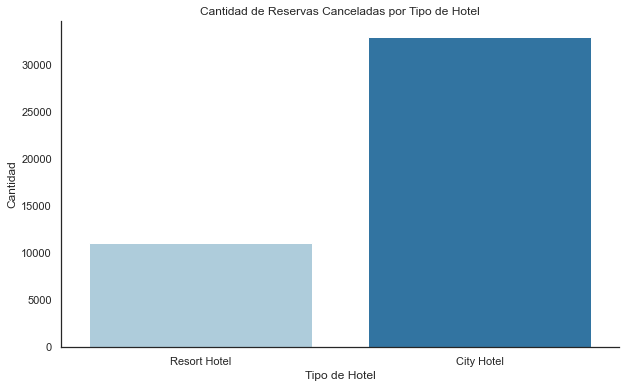

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.hotel, data = canceled)
sns.despine(top=True)
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad')
plt.title('Cantidad de Reservas Canceladas por Tipo de Hotel')
canceled.hotel.value_counts()

Observamos que de las 44115 reservas canceladas, 3/4 corresponden al tipo "City"

### Comidas

Veamos con que tipos de comidas contamos

BB           34428
HB            4980
SC            3943
FB             478
Undefined      286
Name: meal, dtype: int64

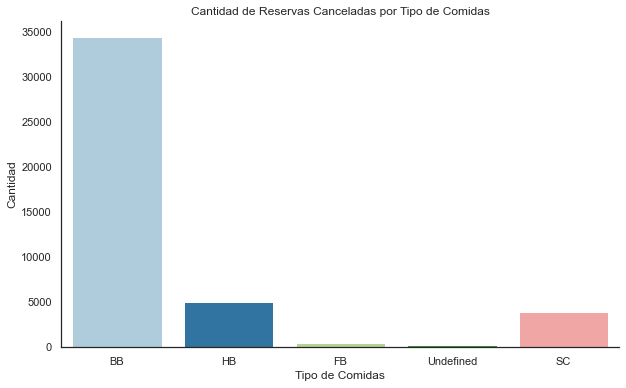

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.meal, data = canceled)
sns.despine(top=True)
plt.xlabel('Tipo de Comidas')
plt.ylabel('Cantidad')
plt.title('Cantidad de Reservas Canceladas por Tipo de Comidas')
canceled.meal.value_counts()

Vemos que el 80 % de las reservas que fueron canceladas habían optado por la opción Bed and Breakfast

### Paises

Veamos el Top 10 de Paises con mayor frecuencia de cancelaciones

PRT    27490
GBR     2451
ESP     2176
FRA     1932
ITA     1332
DEU     1218
IRL      832
BRA      829
USA      501
BEL      473
Name: country, dtype: int64

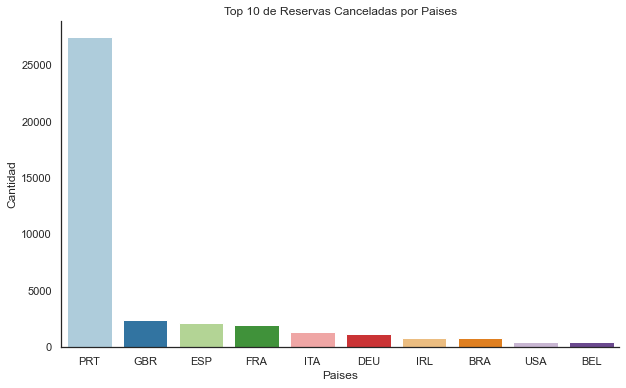

In [12]:
Top_10_countries = ['PRT','GBR','ESP','FRA' ,'ITA','DEU','IRL','BRA','USA','BEL']
Top_10_countries_values = [27518,2453,2177,1934,1333,1218,832,830,501,474]

plt.figure(figsize=(10,6))
sns.barplot(x=Top_10_countries, y=Top_10_countries_values)
sns.despine(top=True)
plt.xlabel('Paises')
plt.ylabel('Cantidad')
plt.title('Top 10 de Reservas Canceladas por Paises')
canceled.country.value_counts().head(10)

Vemos una clara preponderancia de Portugal, seguido por 6 paises más de la UE, en el 8° lugar encontramos a Brasil representando junto a USA (9°) el Continente Americano, cerrando Belgica el 10° puesto. Recordemos que este dataset es de una cadena de hoteles Portuguesa, eso explica dicha preponderancia sobre el resto de los paises

### Segmentos de mercados

Veamos cuales son los segmentos del mercado que operaron en estas reservas canceladas

Online TA        20722
Groups           12093
Offline TA/TO     8270
Direct            1916
Corporate          976
Complementary       87
Aviation            51
Name: market_segment, dtype: int64

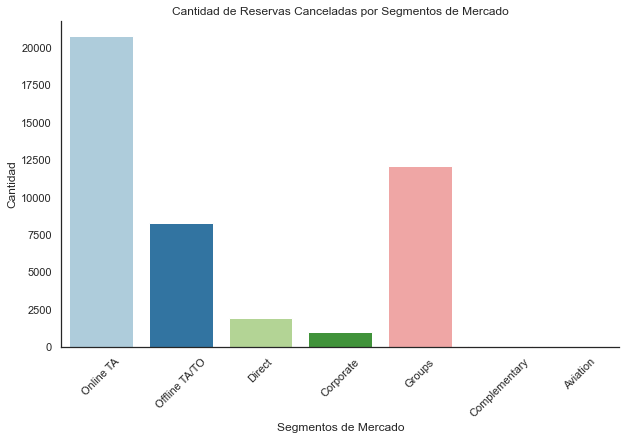

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.market_segment, data=canceled)
sns.despine(top=True)
plt.xlabel('Segmentos de Mercado')
plt.ylabel('Cantidad')
plt.title('Cantidad de Reservas Canceladas por Segmentos de Mercado')
plt.xticks(rotation=45)
canceled.market_segment.value_counts()

Observamos que el segmento Online TA es quien lidera el ranking seguido por Groups y Offline TA/TO como los 3 que más operan al momento de contratar las reservas

### Clase de Huésped

Veamos si los huéspedes que cancelaron la reserva son clientes nuevos o antiguos clientes

0    43566
1      549
Name: is_repeated_guest, dtype: int64

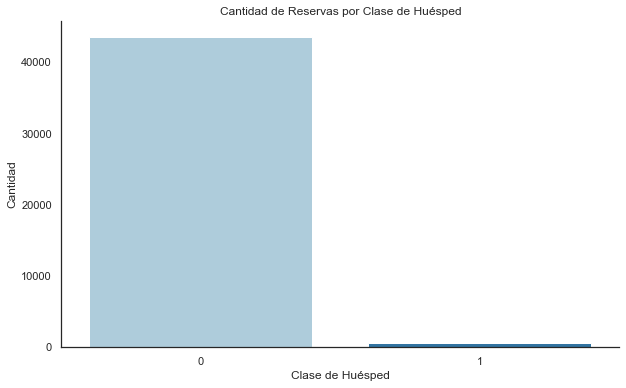

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.is_repeated_guest, data=canceled)
sns.despine(top=True)
plt.xlabel('Clase de Huésped')
plt.ylabel('Cantidad')
plt.title('Cantidad de Reservas por Clase de Huésped')
canceled.is_repeated_guest.value_counts() # Si es un huésped nuevo [0] -- Si ya es cliente [1]

Observamos que el 99 % de las reservas canceladas corresponde a clientes nuevos, esto lo vamos a tener en cuenta a futuro ya que nos aumentará la dificultad a la hora de armar un patrón de huéspedes propensos a cancelar

### Cancelaciones Previas

Veamos que proporción de clientes que cancelaron ya lo habían hecho en el pasado

0     38199
1      5689
24       48
2        37
26       26
Name: previous_cancellations, dtype: int64

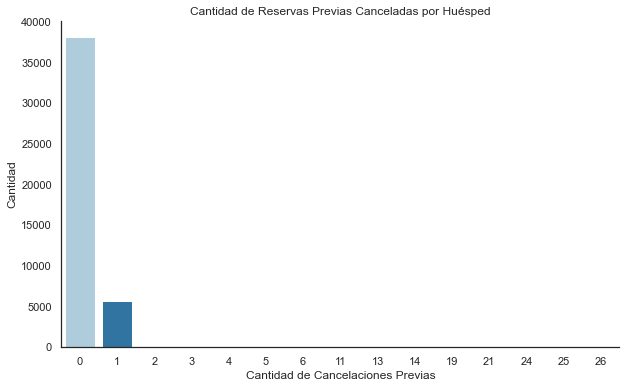

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.previous_cancellations, data=canceled,palette="Paired")
sns.despine(top=True)
plt.xlabel('Cantidad de Cancelaciones Previas')
plt.ylabel('Cantidad')
plt.title('Cantidad de Reservas Previas Canceladas por Huésped')
canceled.previous_cancellations.value_counts().head(5)

Podemos identificar claramente 2 grupos, el primero que nunca han cancelado antes una reserva (86.5%), segundo los que al menos una vez lo han hecho (13%). Por último un 0.5% de clientes que lo han hecho mas de una vez como Tercer grupo. 

### Clase de Habitaciones

Observemos cuál es la tendencia a la hora de elegir la clase de habitación

Text(0.5, 1.0, 'Cantidad de Reservas Canceladas por Tipo de Habitación')

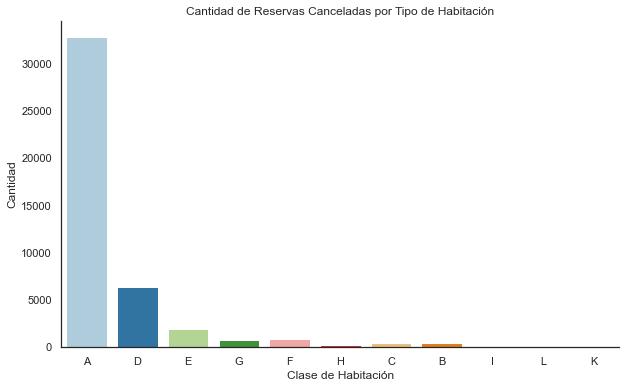

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.assigned_room_type, data=canceled)
sns.despine(top=True)
plt.xlabel('Clase de Habitación')
plt.ylabel('Cantidad')
plt.title('Cantidad de Reservas Canceladas por Tipo de Habitación')

Vemos una clara preferencia por la Clase "A" seguida por la clase "D" y "E" como las reservas de habitaciones que mas tienden a ser canceladas.

### Tipo de Depósitos

Observemos que porcentaje de los clientes que cancelaron habían hecho la reserva con depósito previo

No Deposit    29599
Non Refund    14480
Refundable       36
Name: deposit_type, dtype: int64

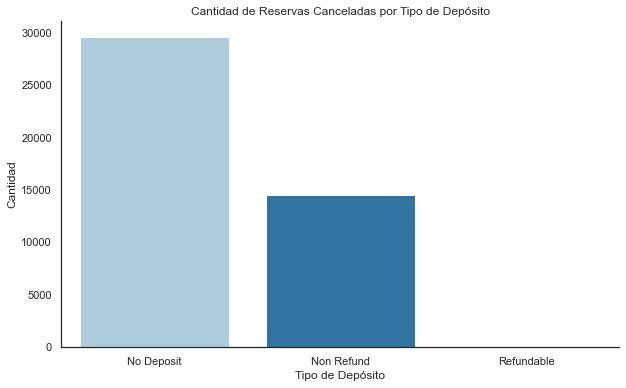

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.deposit_type, data = canceled)
sns.despine(top=True)
plt.xlabel('Tipo de Depósito')
plt.ylabel('Cantidad')
plt.title('Cantidad de Reservas Canceladas por Tipo de Depósito')
canceled.deposit_type.value_counts()

Observamos que alrededor del 66 % de las reservas canceladas no contaron con un depósito previo y el otro 34 % fue con un depósito NO reembolsable, solo 36 reservas fueron reembolsadas

### Tipo de Clientes

Observemos como se distribuyeron las cancelaciones según los tipo de clientes

Transient          36428
Transient-Party     6367
Contract            1262
Group                 58
Name: customer_type, dtype: int64

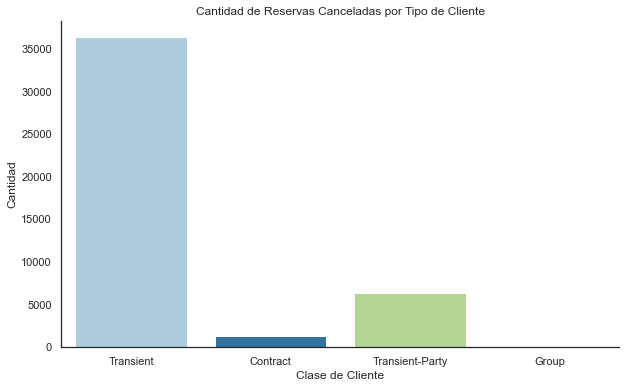

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.customer_type, data=canceled)
sns.despine(top=True)
plt.xlabel('Clase de Cliente')
plt.ylabel('Cantidad')
plt.title('Cantidad de Reservas Canceladas por Tipo de Cliente')
canceled.customer_type.value_counts()

Más del 80 % de las cancelaciones pertenecen al tipo de cliente Transient, seguido por Party-Transient con el 14 %, contratados representa el resto del total menos 58 casos pertenecientes a Grupos

### ADR (Average Daily Ratio)

Vamos a ver los números sobre esta métrica

count    44114.000000
mean       105.008362
std         46.036520
min          0.000000
25%         73.000000
50%         96.300000
75%        127.800000
max        450.000000
Name: adr, dtype: float64

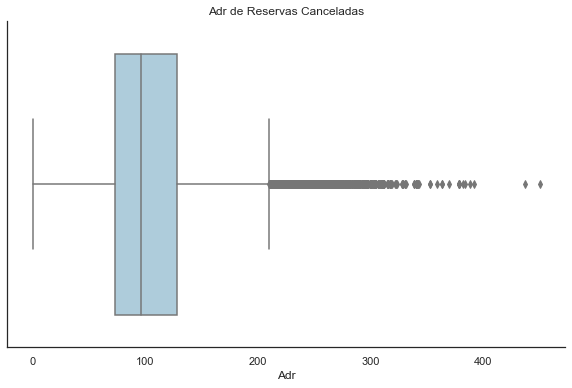

In [19]:
# Filtramos la variable ADR porque en el primer intento encontramos un Outlier que nos distorsionaba  
# el gráfico y no nos aportaba ningún beneficio, lo consideramos un error en la carga del dato.
canceled = canceled[canceled['adr'] <= 520]
plt.figure(figsize=(10,6))
sns.boxplot(x=canceled.adr, data=canceled)
sns.despine(top=True)
plt.xlabel('Adr')
plt.title('Adr de Reservas Canceladas')
canceled.adr.describe()

El método "Describe" nos ayuda a comprender el gráfico de Cajas con mayor exactitud y nos provee información bastante útil sobre el promedio diario de facturación por reserva. El "Adr" promedio es de Usd 105 con un RIQ entre Usd 73 y Usd 127.80 con un precio máximo de Usd 450 y mínimo de Usd 0  

### Fecha de Arribo 

Descubramos mes a mes cuál fue el de mayor frecuencia de cancelaciones

2016-11-07    235
2017-05-19    225
2015-10-16    222
2017-06-08    217
2016-02-17    212
Name: Date_arrive, dtype: int64

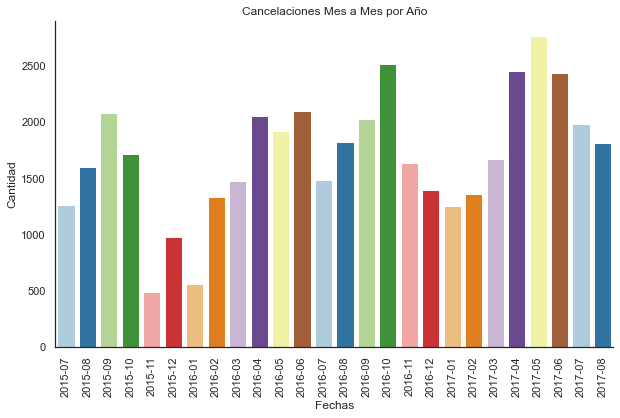

In [20]:
arribo_por_meses =canceled.groupby(canceled['Date_arrive'].dt.to_period('M')).size()
arribo_por_meses.index
arribo_por_meses.values
plt.figure(figsize=(10,6))
sns.barplot(x=arribo_por_meses.index, y=arribo_por_meses.values,palette="Paired")
sns.despine(top=True)
plt.title('Cancelaciones Mes a Mes por Año')
plt.xlabel('Fechas')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
canceled.Date_arrive.value_counts().head(5)

Mayo del 2017, Octubre del 2016 y Septiembre del 2015 fueron los meses de mayor frecuencia de cancelaciones, vemos una alta estacionalidad donde van en aumento las cancelaciones en los meses de temporada alta Europea, desde Abril a Septiembre aproximadamente, donde se da el mayor volúmen de reservas también

### Cantidad de Días

Observemos como se distribuyeron las cancelaciones según la cantidad de días reservados

2.0    12153
3.0    11331
4.0     6357
1.0     5257
7.0     2955
5.0     2654
6.0     1530
Name: Days_Sum, dtype: int64

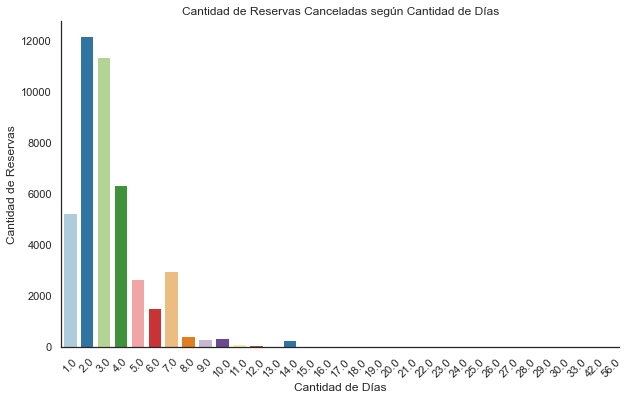

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.Days_Sum, data=canceled,palette="Paired")
sns.despine(top=True)
plt.xlabel('Cantidad de Días')
plt.ylabel('Cantidad de Reservas')
plt.title('Cantidad de Reservas Canceladas según Cantidad de Días')
plt.xticks(rotation=45)
canceled.Days_Sum.value_counts().head(7)

Como observamos claramente en el gráfico hasta 7 días en total, osea una semana, son las mayores frecuencias de cancelaciones destacandose 2 y 3 dias con mas cantidad debido al alto consumo de reservas por fines de semana sumado a algún feriado el día anterior o posterior

### Cantidad de Personas

Observemos que cantidad de personas,como grupo, fueron mas frecuentes en realizar las cancelaciones

Text(0.5, 1.0, 'Cantidad de Reservas Canceladas según Cantidad de Huéspedes')

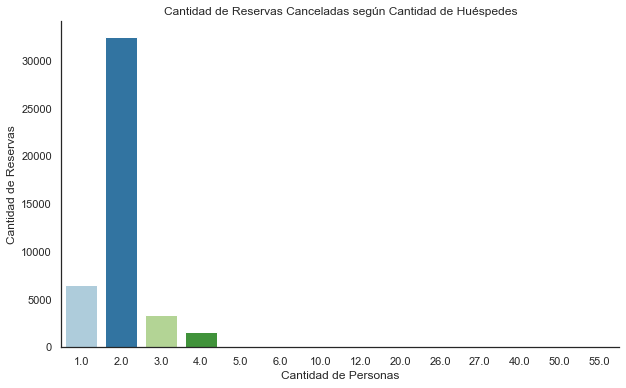

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x=canceled.People_Sum, data=canceled,palette="Paired")
sns.despine(top=True)
plt.xlabel('Cantidad de Personas')
plt.ylabel('Cantidad de Reservas')
plt.title('Cantidad de Reservas Canceladas según Cantidad de Huéspedes')

Creamos una nueva columna donde sumamos la cantidad de personas que esperaba el hotel recibir en cada reserva y que luego fue cancelada, esto nos permite enfocarnos en que rango de cantidad de personas se da con mas frecuencia la cancelación resultando claramente 2 personas como la cantidad mas frecuente de huéspedes

### Días de Diferencia

Vamos a describir con cuantos días de anticipación suelen cancelar los clientes

In [23]:
canceled.Day_dif.value_counts().head(15)

0 days     2036
3 days      717
6 days      635
1 days      622
5 days      603
7 days      599
11 days     592
4 days      579
16 days     531
10 days     507
15 days     507
8 days      496
18 days     489
12 days     484
2 days      483
Name: Day_dif, dtype: int64

Text(0.5, 1.0, 'Top 15 de Días de Antelación para Cancelar un Reserva')

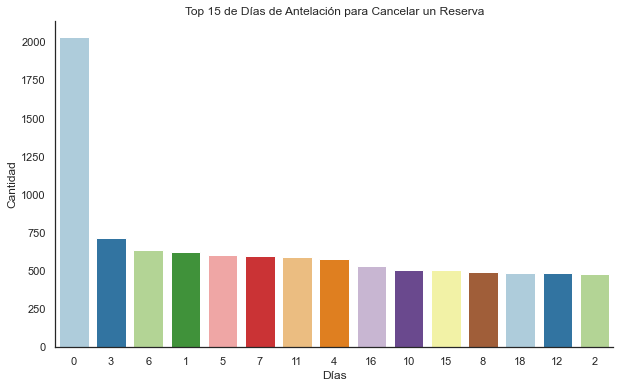

In [24]:
Top_15_dias_dif = ['0','3','6','1','5','7','11','4','16','10','15','8','18','12','2']
Top_15_dias_dif_values = [2036,717,635,622,603,599,592,579,531,507,507,496,489,484,483]

plt.figure(figsize=(10,6))
sns.barplot(x=Top_15_dias_dif, y=Top_15_dias_dif_values,palette="Paired")
sns.despine(top=True)
plt.xlabel('Días')
plt.ylabel('Cantidad')
plt.title('Top 15 de Días de Antelación para Cancelar un Reserva')

El método value_counts nos brinda más información detalla aún, por ejemplo podemos filtrar el Top 15 de Cantidad de Días con mayor Cantidad de cancelaciones como lo muesta el gráfico de barras.

In [25]:
canceled.Day_dif.describe()

count                         44114
mean     86 days 00:45:00.856870835
std      90 days 17:30:36.984139080
min                 0 days 00:00:00
25%                17 days 00:00:00
50%                54 days 00:00:00
75%               128 days 00:00:00
max               526 days 00:00:00
Name: Day_dif, dtype: object

El método Describe otra vez nos ayuda a comprender, esta vez a la variable "Day_dif" que es el resultado de la resta entre la fecha de llegada y la fecha en la cual se hizo la cancelación, de esta forma podemos saber cúal es por ejemplo el promedio de días de anticipación con el cual los clientes hacen la cancelación, en este caso es de 86 días promedio. 

### Perfil de reserva susceptible de cancelación: 

***Reservas de 2 personas, con residencia en el mismo pais, de 2 a 3 noches, en habitaciones clase "A" en hoteles tipo City y no suelen hacer depositos previos. Todo esto ocurre con más frecuencia en temporada alta de reservas que va desde Abril hasta Septiembre es por eso que es importante hacer dicha previsión.***

***Por último sabemos que el promedio de cantidad de días que transcurren desde la futura fecha de arribo elegida por el huésped hasta la fecha de cancelación son de 86 días, lo que nos otorga un rango estimado desde el cuál debemos estar atentos a una posible cancelación.***

Aqui termina el **EDA** con el Perfil de reserva susceptible de cancelación, como análisis descriptivo basado en los gráficos expuestos en esta parte.

In [26]:
# Aqui transformamos las variables categóricas en numéricas para poder correr el algoritmo

Hotels = {'City Hotel': 0, 'Resort Hotel': 1}
Hotel_1['hotel'] = Hotel_1['hotel'].map(Hotels)

Meals = {'BB': 0,'HB': 1,'SC': 2,'Undefined': 3,'FB': 4,}
Hotel_1['meal'] = Hotel_1['meal'].map(Meals)

Markets = {'Online TA': 0,'Offline TA/TO': 1,'Groups': 2,'Direct': 3,'Corporate': 4,'Complementary': 5,'Aviation': 6}
Hotel_1['market_segment'] = Hotel_1['market_segment'].map(Markets)

Rooms = {'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'J': 9 ,'K': 10,'L': 11,}
Hotel_1['reserved_room_type'] = Hotel_1['reserved_room_type'].map(Rooms)

Rooms1 = {'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'J': 9 ,'K': 10,'L': 11,}
Hotel_1['assigned_room_type'] = Hotel_1['assigned_room_type'].map(Rooms1)

Deposits = {'No Deposit': 0,'Non Refund': 1,'Refundable': 2,}
Hotel_1['deposit_type'] = Hotel_1['deposit_type'].map(Deposits)

Customers = {'Transient': 0,'Transient-Party': 1,'Contract': 2,'Group': 3,}
Hotel_1['customer_type'] = Hotel_1['customer_type'].map(Customers)

In [27]:
# Aqui eliminamos las columnas tipo fecha y "country" para correr el algoritmo

Hotel_2 = Hotel_1.drop(Hotel_1.iloc[ : , [3,12,15,16]], axis = 1)
Hotel_2

,hotel,is_canceled,meal,market_segment,is_repeated_guest,previous_cancellations,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,People_Sum,Days_Sum
0,1,0,0,3,0,0,0,2,0,0,75.00,1.0,1.0
1,1,0,0,4,0,0,0,0,0,0,75.00,1.0,1.0
2,1,0,0,0,0,0,0,0,0,0,98.00,2.0,2.0
3,1,0,0,0,0,0,0,0,0,0,98.00,2.0,2.0
4,1,0,0,3,0,0,2,2,0,0,107.00,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118083,0,0,0,1,0,0,0,0,0,0,96.14,2.0,7.0
118084,0,0,0,0,0,0,4,4,0,0,225.43,3.0,7.0
118085,0,0,0,0,0,0,3,3,0,0,157.71,2.0,7.0
118086,0,0,0,0,0,0,0,0,0,0,104.40,2.0,7.0


In [28]:
X = Hotel_2.drop("is_canceled", axis=1)       # feature matrix
y = Hotel_2['is_canceled']                    # target feature

In [29]:
# El "Cero" indica que No cancelaron. el "1" indica que SI lo hicieron

y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [30]:
# Importamos la libreria necesaria para correr el algoritmo

import statsmodels.api as sm

# Importamos las métricas

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### El método para la reducción de dimensionalidad elegido fue $\color{red}{\text{Forward Selection
​}}$

In [31]:
def forward_selection(Hotel_2, target, significance_level=0.05):
    initial_features = Hotel_2.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(Hotel_2[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [32]:
forward_selection(X,y)

<ipython-input-31-11a3cbc15162>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-31-11a3cbc15162>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-31-11a3cbc15162>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-31-11a3cbc15162>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['previous_cancellations',
 'hotel',
 'customer_type',
 'assigned_room_type',
 'reserved_room_type',
 'deposit_type',
 'market_segment',
 'People_Sum',
 'Days_Sum',
 'adr',
 'is_repeated_guest']

### Elegimos el Algoritmo Supervisado de Clasificación $\color{red}{\text{Random Forest Classifier​}}$

In [33]:
# Definimos matriz de diseño "X" y vector respuesta "y"

X = X
y = abs(pd.Series(Hotel_2['is_canceled']))

# Separamos en entrenamiento/test en razon 80/20 %

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# Creamos un modelo Random Forest con parametros por defect

modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)

# Obtenemos las predicciones del modelo con X_test

preds = modelo.predict(X_test) 

### Elegimos la $\color{red}{\text{Matriz de Confusión​}}$ para graficar y evaluar las métricas

<Figure size 720x432 with 0 Axes>

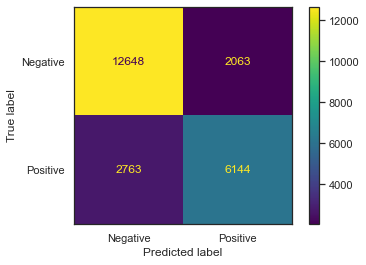

In [34]:
# Graficamos las predicciones hechas anteriormente

plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative','Positive'])

In [35]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([12648,  2063,  2763,  6144], dtype=int64)

In [36]:
# Exactitud

accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.7956643238208146

In [37]:
# Precision se evalua para cada categoria

precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(0.7486292189594249, 0.8207124781000584)

In [38]:
# Recall se evalua para cada categoria

recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.6897945436173796, 0.8597648018489565)

In [39]:
# F1 Score se evalua para cada categoria 

f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

(0.7180086478906158, 0.839784874842308)

In [40]:
# El "Cero" significa que NO cancelaron y el "1" significa que Si cancelaron

# Todas las metricas en uno

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     14711
           1       0.75      0.69      0.72      8907

    accuracy                           0.80     23618
   macro avg       0.78      0.77      0.78     23618
weighted avg       0.79      0.80      0.79     23618



### $\color{Red}{\text{Conclusiones​}}$

#### 1° La exactitud del 80 % es un buen nivel inicial, nos dice que el porcentaje de elementos clasificados correctamente es alto, el desafío siguiente será mejorarla.En nuestro caso en particular nos indica que sobre 23618 reservas, 18792 fueron correctamente clasificadas ya sea que efectivamente fueron canceladas (6144 VP) como las que no lo fueron (12648 VN).

#### 2° La precisión del 75 % para nosotros se encuentra en el límite de lo aceptable como métrica que calcula la cantidad de casos positivos, entendiéndose como positivos las reservas susceptibles de cancelación. 6144 (VP) / (6144 (VP) + 2063 (FP)) = 0.7486. En la siguiente etapa vamos a introducir cambios para elevar ese porcentaje ya que el principal objetivo del modelo es predecir que porcentaje de reservas serán pasibles de cancelaciones y mientras mas alto sea la proporción mejores resultados obtendremos.

#### 3° La sensibilidad o recall del 69 % es baja, no es una buena performance del modelo.                         Esta es una métrica importante ya que conocer que porcentaje de casos positivos fueron correctamente identificados dice mucho sobre nuestro modelo, debemos ajustarlo para elevar este número. En nuestro caso en particular nos indica que sobre 8907 reservas canceladas, 6144 fueron correctamente clasificadas y 2763 no lo fueron: 6144 (VP)/(6144 (VP) + 2763 (FN))=0.6897

#### 4° La especificidad es del 86 %, en contraposición con el Recall es un buen dato este, significa que el modelo predice muy bien los casos negativos, osea que de 14711 reservas que no iban a ser canceladas, 12648 (VN) fueron correctamente identificadas y 2063 no lo fueron (FP). 

#### 5° El F1 Score resulto ser del 0.72 lo cual nos deja un margen hacia arriba para mejorar el modelo, esta métrica se compone con la siguiente fórmula: 2 * (Recall * Precision) / (Recall + Precision), reemplazamos los valores por 2 * (0.6897 * 0.7486) / (0.6897 + 0.7486)=0.7180

#### Como conclusión general el modelo presenta muchos errores tanto en las predicciones sobre reservas que iban a ser canceladas y no lo fueron (FP)  como en las reservas que predijo que no iban a ser canceladas y si lo hicieron (FN). Vamos encontrar la forma de bajar esta cantidad de errores ya que una vez terminado el modelo debemos pensar como manejar esas reservas pasibles de cambios y si son muchas el costo económico y de tiempo será un dato importante en la ecuación costo/beneficio.
#### Los próximos pasos a seguir será setear el modelo con nuevos parámetros y volver a medir los resultados, también evaluaremos usar otros algoritmos de clasificación que puedan darnos mejores desempeños.